- y = mx+c
   = x . Θ
-   = (1, x1, x2, x3) . (c, m1, m2, m3)
   = c + x1m1 + x2m2 + x3m3
- Θ = (c, m1, m2, m3)
- X . Θ = yh
- (6, 100) . (100, 1) = (100, 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=1, noise=15, bias=10, random_state=1)

In [2]:
X_mod = np.hstack([np.ones((X.shape[0], 1)), X])

In [3]:
class CustomLinearReg:
    def __init__(self, lr=.01, iters=100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        
        
        errors = []
        for i in range(self.iters):
            error =  self.gradient_decend(X, y)
            errors.append(error)
            
        return errors
    
    def gradient_decend(self, X, y):
        delta_theta, error = self.gradient(X, y)
        self.theta_ += delta_theta
        return error
    
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)   # reshape of y because actual y shape is (100,) which needed to be convert over (100, 1)
        yh = self.hypo(X)
        dmsedm = np.dot(X.T,(yh-ya))/len(X)
       
        delta_theta = -dmsedm*self.lr
       
        error = np.mean((yh-ya)**2)
        return delta_theta, error
        
    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypo(X).flatten()


In [4]:
model = CustomLinearReg(lr = 0.0008, iters=10000)
error = model.fit(X, y)

In [5]:
model.theta_

array([[13.07224356],
       [81.88267009]])

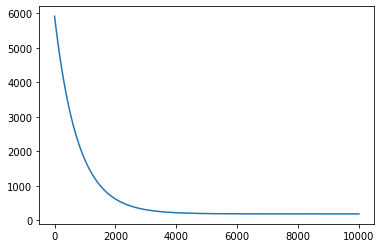

In [6]:
plt.figure()
plt.plot(error)
plt.show()

In [7]:
model.predict(X[:10])

array([ -37.02000504,   -7.34686863,   53.07341378,   75.46775364,
        137.51890254,   43.98817451,   55.07230682,  -41.89118192,
       -101.27660517,   38.91727581])

In [8]:
y[:10]

array([-43.9977391 ,  -3.0281917 ,  36.92519443, 101.19767617,
       148.91946935,  42.58496708,  45.11116131, -22.95938308,
       -92.90734094,  34.22106871])

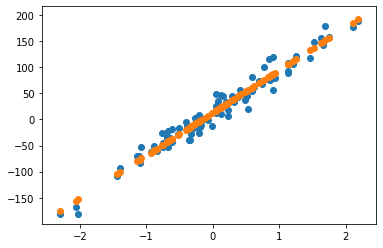

In [9]:
plt.scatter(X, y)
plt.scatter(X, model.predict(X))

In [10]:
class CustomLinearReg:
    def __init__(self, lr=.01, iters=100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        ya = y.reshape(-1, 1)
        
        first = np.linalg.inv(np.dot(X.T, X))
        second = np.dot(X.T, y)
        self.theta_ = np.dot(first, second)
    
    def gradient_decend(self, X, y):
        delta_theta, error = self.gradient(X, y)
        self.theta_ += delta_theta
        return error
    
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)   # reshape of y because actual y shape is (100,) which needed to be convert over (100, 1)
        yh = self.hypo(X)
        dmsedm = np.dot(X.T,(yh-ya))/len(X)
       
        delta_theta = -dmsedm*self.lr
       
        error = np.mean((yh-ya)**2)
        return delta_theta, error
        
    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypo(X).flatten()


In [11]:
model = CustomLinearReg(lr = 0.0008, iters=10000)
error = model.fit(X, y)

In [12]:
model.theta_

array([13.04052158, 82.04100436])

In [13]:
model.predict(X[:10])

array([ -37.14858902,   -7.41807448,   53.11904097,   75.55668415,
        137.72781965,   44.01623382,   55.12179922,  -42.02918516,
       -101.52944037,   38.93552967])

In [14]:
y[:10]

array([-43.9977391 ,  -3.0281917 ,  36.92519443, 101.19767617,
       148.91946935,  42.58496708,  45.11116131, -22.95938308,
       -92.90734094,  34.22106871])

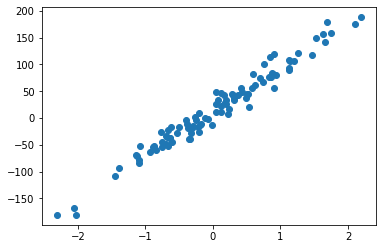

In [15]:
plt.scatter(X, y)

### direct sklearn function used

- the value of prediction will match leading that SKlearn use Close form

In [16]:
m2 = LinearRegression()

In [17]:
m2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
m2.predict(X[:10])

array([ -37.14858902,   -7.41807448,   53.11904097,   75.55668415,
        137.72781965,   44.01623382,   55.12179922,  -42.02918516,
       -101.52944037,   38.93552967])